<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

change with respect to a parameter that can be observed/quantified

### 1.3 Calculus: Meaning and Notation

rate of change of a population is the population * constant

### 1.4 Calculus: Getting a feel for \$\dfrac{dN}{dt}$

as the population exceeds carrying capacity, population will start to decrease

### 1.5 Solving Differential Equations

Solution must be analytical

### 1.6 The Euler Method

euler method to figure out the numerical values of the solution

### 1.7 Using Euler for the logistic equation

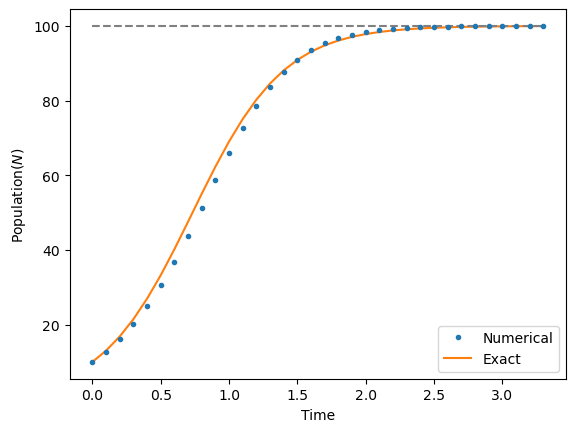

In [6]:
from matplotlib import pyplot as plt
def logistic(time, N0, carrying_capacity, rate):
    '''
    This outputs the exact solution to 
    the logistic differential equation.
    '''
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output


N_stop_difference = 1E-2                # Stop running if the change in population
                                        # between consecutive runs is less than this value
dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)

    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt

    # Should we stop the loop?
    try:
        # The lists start empty so the following will raise an
        # error the first two rounds. I am using try to get around it.
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        # I am being paranoid and checking if there is an error even
        # when the list has more than two elements
        if len(data['N']) < 2:
            pass
        else:
            print('Trouble')
            quit()

exact_data = logistic(time=np.array(data['time']),
                      N0=N0,
                      carrying_capacity=K,
                      rate=rate)

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)  # zorder pushes the plot back
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)
plt.show()

### 1.8 Some things to note about the code

never compare 2 floats

## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

In [ ]:
a,b,d,g = 2,2,3,3



### 2.2 Example code

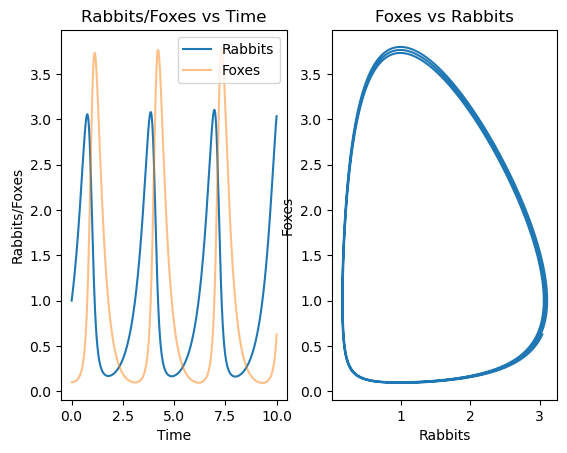

In [10]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []


# Lotka-Volterra equations
def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes


def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes


while True:
    data.append([time, rabbits, foxes])

    # Don't update the original variables because we need
    # the OLD values of rabbits to calculate foxes
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt

    # Using the old value of rabbits
    foxes += dfoxes_dt(rabbits, foxes)*dt

    # No more need for two variables
    rabbits = rabbits_new

    time += dt

    if time > max_time:
        break

# Reorganising the data so I can easily access
# them without having to mess with indices
data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')
plt.show()

### 2.3 Some things to note about the code

use functions to abstract derivatives
use a dictionary for more readable code

## 3 Hello SciPy

### 3.1 SciPy odeint()

In [13]:
pip install scipy

In [24]:
!conda install scipy -y

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\patyu\miniconda3

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    appdirs-1.4.4              |     pyhd3eb1b0_0          12 KB
    blas-1.0                   |              mkl           6 KB
    ca-certificates-2023.01.10 |       haa95532_0         121 KB
    conda-23.1.0               |  py310haa95532_0         957 KB
    fftw-3.3.9                 |       h2bbff1b_1         672 KB
    icc_rt-2022.1.0            |       h6049295_2         6.5 MB
    intel-openmp-2021.4.0      |    haa95532_3556         2.2 MB
    mkl-2021.4.0               |     haa95532_640       114.9 MB
    mkl-service-2.4.0          |  py310h2bbff1b_0          48 KB
    mkl_fft-1.3.1              |  py310ha0764ea_0         136 KB
    mkl_random-1

In [29]:
!conda install numpy -y

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
from scipy.integrate import odeint

### 3.2 Radioactivity

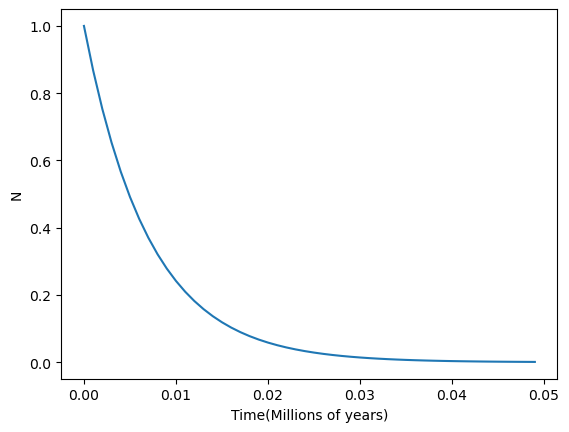

In [9]:
from matplotlib import pyplot as plt
max_time = 0.05
dt = .001
decay_constant = 142       # For 85 Rb (per Myr)
N0 = 1                     # Starting value of N (in billions of atoms)


def dNdt(N, time, decay_constant):
    '''
    Function for the derivative.
    '''
    return - decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=[N0],                  # Initial values
               func=dNdt,                # Function for the drivative
               t=all_time,               # Time span
               args=(decay_constant,)    # Any arguments to dNdt
               )
plt.plot(all_time, all_N)
plt.xlabel("Time(Millions of years)")
plt.ylabel("N")
plt.show()

### 3.3 Logistic Equation

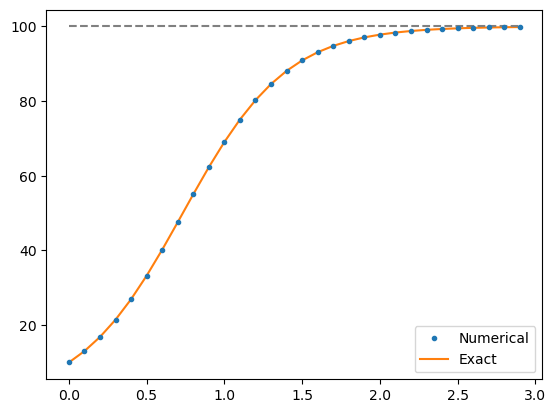

In [21]:
plt.style.use('default')
def dNdt(N, time, rate, carrying_capacity):
    '''
    Function for the derivative.
    '''
    return rate*N*(1-N/carrying_capacity)


max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))
def logistic(time, N0, carrying_capacity, rate):
    '''
    This outputs the exact solution to 
    the logistic differential equation.
    '''
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output


exact_data = logistic(time=np.array(data['time']),
                      N0=N0,
                      carrying_capacity=K,
                      rate=rate)
plt.plot(data['time'], data['N'], '.', label = 'Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)
plt.legend(loc = 'lower right')
plt.show()

### 3.4 Predator-Prey

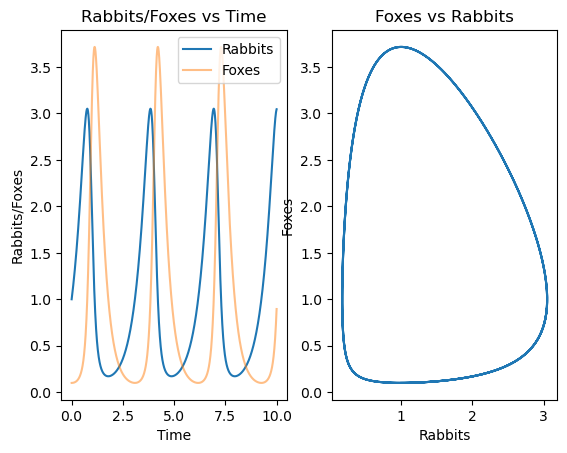

In [24]:
plt.style.use('default')
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

# Lotka-Volterra equations
def dy_dt(y, t):
    '''
    Function for the derivative.
    - y contains all the variables for the simulation 
    - t is the dependant variable
    '''

    rabbits, foxes = y

    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    # Foxes
    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

# Note the order I pass the rabbit and fox information
results = odeint(y0=[rabbits0, foxes0],          # Dependant variable
                 func=dy_dt,                     # Derivatives
                 t=data['time']                  # Independant variable
                 )
# Extract the individual results (Note, the order matters)
data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]
fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')
plt.show()

## Exercise 1 :  The Lorentz Attaractor

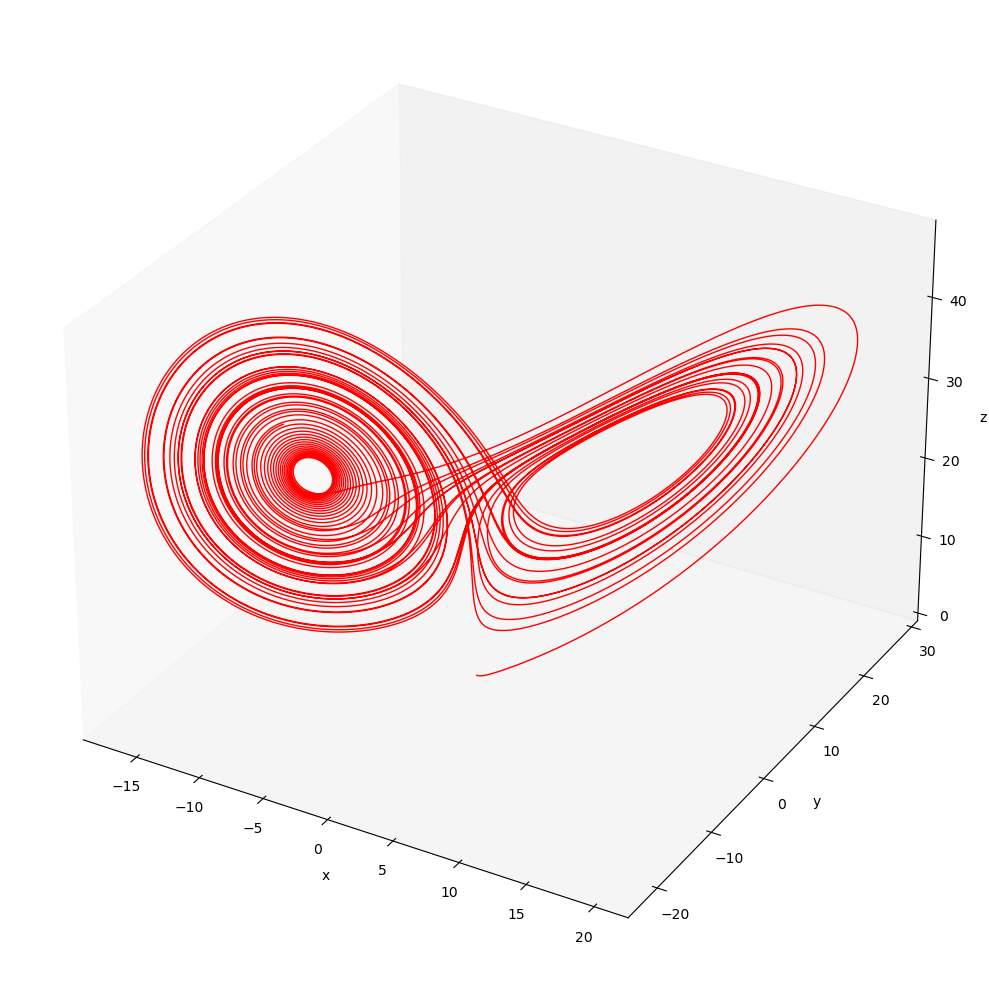

In [17]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def derivative(value, t):
    x, y, z = value
    dx_dt = 10 * (y - x)
    dy_dt = x * (28 - z) - y
    dz_dt = x*y - z*8/3
    
    return [dx_dt, dy_dt, dz_dt]

max_time = 50
d = 0.001
x0, y0, z0 = (0,1,0)
time = np.arange(0, max_time, d)

results = odeint(y0=[0,1,0],                     # Dependant variable
                 func=derivative,                # Derivatives
                 t = time                        # Independant variable
                 )
plt.figure(figsize = (10,10))
x = results[:, 0]
y = results[:, 1]
z = results[:, 2]
ax = plt.axes(projection='3d')
ax.grid(False)
ax.plot3D(x, y, z, 'red', lw = 1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.tight_layout()
plt.show()